# Linear Regression

In [1]:
%pylab inline
#import sklearn.preprocessing as pre
from mpl_toolkits.mplot3d import Axes3D
import doctest

Populating the interactive namespace from numpy and matplotlib


In [2]:
!head ex1data1.txt

6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166


## Load Data

In [3]:
data = np.loadtxt('ex1data1.txt',delimiter=',');
X = data[:,0].reshape((-1,1))
y = data[:,1].reshape((-1,1))

## Plot Data

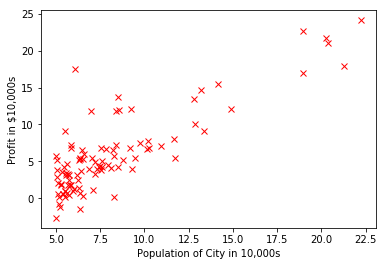

In [4]:
def plot_data(X,y):
    plt.plot(X,y,'rx');
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s');
    
plot_data(X,y)

## Insert Bias Feature

In [5]:
def insert_bias_feature(X):
    """Insert a column filled with ones in front of an unbiased array of features.
    
    The new column is inserted at index ``0`` on axis ``1``.
    
    Parameters
    ----------
    X : array_like
        Input array.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``
        before the new column insertion.
        
    Returns
    -------
    numpy.ndarray
        Output array.
        If `X` has ``(m,n)`` shape, the return value will have ``(m,n+1)``shape.
        
    Examples
    --------
    >>> x = np.array([[2,3],[4,5],[6,7]])
    >>> insert_bias_feature(x)
    array([[1, 2, 3],
           [1, 4, 5],
           [1, 6, 7]])
     
    >>> x = np.array([[2],[3],[4]])
    >>> insert_bias_feature(x)
    array([[1, 2],
           [1, 3],
           [1, 4]])
     
    >>> x = [2,3,4]
    >>> insert_bias_feature(x)
    array([[1, 2],
           [1, 3],
           [1, 4]])
    """
    if np.ndim(X) == 1:
        X = np.reshape(X, (-1,1))
        
    return np.insert(X,0,1,axis=1)

## Initialize Theta

In [6]:
def initialize_theta(shape, order='C'):
    """Return a new array of given shape, filled with `numpy.float64` zeros.
    
    Parameters
    ----------
    shape : int or sequence of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    order : {'C', 'F'}, optional
        Whether to store multidimensional data in C- or Fortran-contiguous
        (row- or column-wise) order in memory.
        
    Returns
    -------
    numpy.ndarray
        Array of `numpy.float64` zeros with the given shape and order.
    
    Examples
    --------
    >>> initialize_theta(5)
    array([0., 0., 0., 0., 0.])
    
    >>> initialize_theta((5,))
    array([0., 0., 0., 0., 0.])
    
    >>> initialize_theta((2, 1))
    array([[0.],
           [0.]])
    
    >>> initialize_theta((2,2))
    array([[0., 0.],
           [0., 0.]])
    """
    return np.zeros(shape)

## Cost Function

In [7]:
def linear_loss(theta,X,y):
    """Compute linear regression cost from unbiased examples.
    
    The cost is the result of the Mean Squared Error computation.

    Parameters
    ----------
    theta : array_like
        Parameters (weights) of the model, including the bias parameter.
        If `theta` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    X : array_like
        Input examples.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    y : array_like
        Output examples.
        If `y` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)```.
        
    Returns
    -------
    J : numpy.float64
        Cost value.
    
    Examples
    --------
    >>> t = [[0],[0]]
    >>> x = [[6.1101], [5.5277], [8.5186], [7.0032], [5.8598]]
    >>> y = [[17.592], [9.1302], [13.662], [11.854], [6.8233]]
    >>> linear_loss(t,x,y)
    76.656399893
    
    >>> t = [0,0]
    >>> x = [6.1101, 5.5277, 8.5186, 7.0032, 5.8598]
    >>> y = [17.592, 9.1302, 13.662, 11.854, 6.8233]
    >>> linear_loss(t,x,y)
    76.656399893
    """
    if np.ndim(theta) == 1:
        theta = np.reshape(theta,(-1,1))
    if np.ndim(y) == 1:
        y = np.reshape(y, (-1,1))
        
    X_biased = insert_bias_feature(X)
    z = X_biased @ theta
    J = np.sum(np.square(z - y)) / (2*len(y))
    return J

In [8]:
def compute_cost(X,y):
    initial_theta = initialize_theta((2,1))
    initial_cost = linear_loss(initial_theta,X,y)
    print(f'The initial cost is {initial_cost}')

compute_cost(X,y)

The initial cost is 32.072733877455676


## Gradient Descent

In [9]:
def linear_gradient_descent(X,y,alpha,iterations):
    """Minimize linear loss from unbiased examples using gradient descent method.
    
    Parameters
    ----------
    X : array_like
        Input examples.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    y : array_like
        Output examples.
        If `y` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    alpha: float
        The learning rate.
        Usually choosen from: ``[0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]``.
    iterations: int
        The number of iterations of the gradient descent algorithm.
        
    Returns
    -------
    theta : numpy.ndarray
        The model's parameters (weights).
    
    Examples
    --------
    >>> x = [[6.1101], [5.5277], [8.5186], [7.0032], [5.8598]]
    >>> y = [[17.592], [9.1302], [13.662], [11.854], [6.8233]]
    >>> a = 0.01
    >>> i = 400
    >>> linear_gradient_descent(x,y,a,i)
    array([[0.56553976],
           [1.69193576]])
    
    >>> x = [6.1101, 5.5277, 8.5186, 7.0032, 5.8598]
    >>> y = [17.592, 9.1302, 13.662, 11.854, 6.8233]
    >>> linear_gradient_descent(x,y,a,i)
    array([[0.56553976],
           [1.69193576]])
    """
    if np.ndim(y) == 1:
        y = np.reshape(y, (-1,1))
        
    X_biased = insert_bias_feature(X)
    m, n = X_biased.shape
    theta = initialize_theta((n,1))
    for i in range(iterations):
        z = X_biased @ theta
        D = X_biased.T @ (z - y) / len(y)
        theta -= alpha * D
    return theta

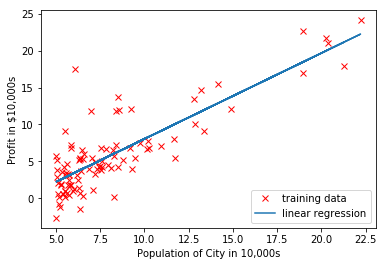

In [10]:
def plot_gradient_descent(X,y,alpha,iterations):
    theta = linear_gradient_descent(X,y,alpha,iterations)
    X_biased = insert_bias_feature(X)
    
    plt.plot(X,y,'rx',label='training data')
    plt.plot(X,X_biased @ theta,'-',label='linear regression')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.legend(loc=4);
    
plot_gradient_descent(X,y,alpha=0.01,iterations=1500)

## Predict

In [11]:
def make_predictions(X,y,xs):
    theta = linear_gradient_descent(X,y,alpha=0.01,iterations=1500)
    xs_biased = insert_bias_feature(xs)
    ys = xs_biased @ theta
    for x,y in np.hstack([xs,ys]):
        print(f'The prediction for profit in area of {x * 1e4:,.0f} people is ${y * 1e4:.2f}')
    
make_predictions(X,y,xs=np.array([[3.5],[7]]))

The prediction for profit in area of 35,000 people is $4519.77
The prediction for profit in area of 70,000 people is $45342.45


## Visualizing J

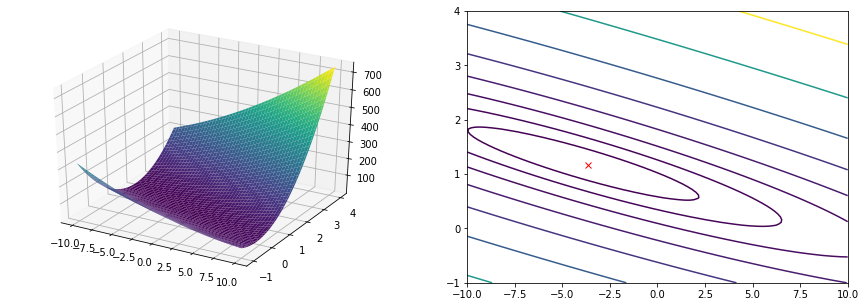

In [12]:
def visualize_cost_function(X,y):
    theta =  linear_gradient_descent(X,y,alpha=0.01,iterations=1500)
    theta0_vals = np.linspace(-10,10,100)
    theta1_vals = np.linspace(-1,4,100)
    J_vals = np.zeros((len(theta1_vals), len(theta0_vals)))
    
    for i in range(len(theta1_vals)):
        for j in range(len(theta0_vals)):
            J_vals[i,j] = linear_loss([[theta0_vals[j]], [theta1_vals[i]]],X,y)
    
    U,V = np.meshgrid(theta0_vals, theta1_vals)
    
    #plot
    fig = plt.figure(figsize=(15,5))
    
    # left axe
    ax1 = fig.add_subplot(1,2,1,projection='3d')
    ax1.plot_surface(U,V,J_vals,cmap='viridis');
    
    #right axe
    ax2 = fig.add_subplot(1,2,2)
    ax2.contour(theta0_vals,theta1_vals,J_vals, np.logspace(-2,3,20));
    ax2.plot(theta[0],theta[1],'rx');
    
visualize_cost_function(X,y)

## Unit Tests

In [13]:
doctest.testmod()

TestResults(failed=0, attempted=26)

In [14]:
# set the file name (required)
__file__ = 'ex1.ipynb'

# add ipython magics
import ipytest.magics
import pytest

In [16]:
%%run_pytest[clean] -qq -v

def test_insert_bias_feature():
    ipytest.assert_equals(insert_bias_feature([[2,3], [4,5], [6,7]]),
                          np.array([[1, 2, 3], [1, 4, 5], [1, 6, 7]]))
    ipytest.assert_equals(insert_bias_feature(np.array([[2],[3],[4]])),
                          np.array([[1, 2], [1, 3], [1, 4]]))
    ipytest.assert_equals(insert_bias_feature([2,3,4]),
                          np.array([[1, 2], [1, 3], [1, 4]]))

def test_initialize_theta():
    ipytest.assert_equals(initialize_theta(5), np.array([0., 0., 0., 0., 0.]))
    ipytest.assert_equals(initialize_theta((5,)), np.array([0., 0., 0., 0., 0.]))
    ipytest.assert_equals(initialize_theta((2, 1)), np.array([[0.], [0.]]))
    ipytest.assert_equals(initialize_theta((2,2)), np.array([[0., 0.], [0., 0.]]))
    
def test_linear_loss():
    ipytest.assert_equals(linear_loss(
        theta=[[0],[0]],
        X=[[6.1101], [5.5277], [8.5186], [7.0032], [5.8598]],
        y=[[17.592], [9.1302], [13.662], [11.854], [6.8233]]), 76.656399893)
    ipytest.assert_equals(linear_loss(
        theta=[0,0],
        X=[6.1101, 5.5277, 8.5186, 7.0032, 5.8598],
        y=[17.592, 9.1302, 13.662, 11.854, 6.8233]), 76.656399893)

def test_linear_gradient_descent():
    ipytest.assert_equals(linear_gradient_descent(
        X=[[6.1101], [5.5277], [8.5186], [7.0032], [5.8598]],
        y=[[17.592], [9.1302], [13.662], [11.854], [6.8233]],
        alpha=0.01, iterations=400), np.array([[0.56553976],[1.69193576]]))
    ipytest.assert_equals(linear_gradient_descent(
        X=[6.1101, 5.5277, 8.5186, 7.0032, 5.8598],
        y=[17.592, 9.1302, 13.662, 11.854, 6.8233],
        alpha=0.01, iterations=400), np.array([[0.56553976],[1.69193576]]))

....                                                                                                                                                                                                 [100%]
4 passed in 0.08 seconds
